In [1]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import collections 
from sklearn.decomposition import PCA, FastICA, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics  
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# load data
dfc = pd.read_csv("DFC_SOCRATA_FAC_DATA.csv")
#print (dfc.head())
#display(dfc.describe())
#pd.plotting.scatter_matrix(dfc, alpha = 0.3, figsize = (28,28), diagonal = 'kde')
dfc['NETWORK'] = 'Network_' + dfc['NETWORK'].astype(str)

In [3]:
dfc.drop(dfc.columns[[0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 21, 22, 23, 24, 26, 28, 30, 31, 32, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 101, 102, 103, 104
]], axis=1, inplace=True)
#list(dfc)
#dfc.dtypes

In [4]:
#preprocess data
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():       
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)        
        # Collect the revised columns
        output = output.join(col_data)   
    #print "output type ", type(output)
    #output.info()
    #replace missing values with respective column means
    output = output.apply(lambda x: x.fillna(x.mean()),axis=0)
    #output.info()
    return output

dfc_clean = preprocess_features(dfc)
#print (dfc_clean.head())

In [16]:
dfc_clean_std = StandardScaler().fit_transform(dfc_clean)

dfc_clean_std.shape

c:\users\falmachraki\appdata\local\continuum\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\falmachraki\appdata\local\continuum\anaconda3\envs\py36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(7281, 202)

In [18]:
#consider data transformation to fix distributions
dfc_pca = PCA(n_components=50).fit(dfc_clean_std)
dfc_ica = FastICA(n_components=50,max_iter=2000, tol=0.001).fit(dfc_clean_std)
dfc_RP = GaussianRandomProjection(n_components=50).fit(dfc_clean_std)
dfc_FA = FactorAnalysis(n_components=50).fit(dfc_clean_std)

red_dfc_pca = dfc_pca.transform(dfc_clean_std)
red_dfc_ica = dfc_ica.transform(dfc_clean_std)
red_dfc_RP = dfc_RP.transform(dfc_clean_std)
red_dfc_FA = dfc_FA.transform(dfc_clean_std)

dfc_pca_components = dfc_pca.components_
dfc_ica_components = dfc_ica.components_
dfc_RP_components = dfc_RP.components_
dfc_FA_components = dfc_FA.components_

# exp_var = dfc_pca.explained_variance_ratio_

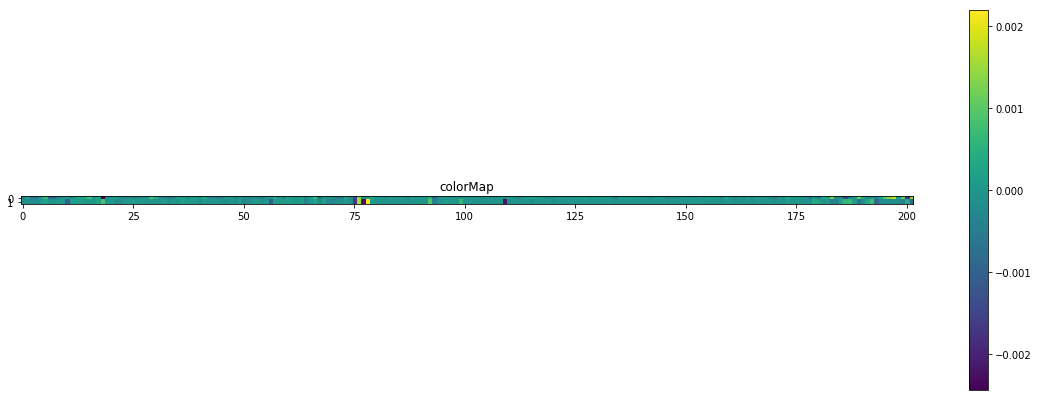

In [76]:
# PCA plots
# dfc_pca_results = vs.pca_results(dfc_clean, dfc_pca)

#ICA plots
# pca_fig = plt.figure(figsize=(20, 7))
# ax = pca_fig.add_subplot(111)
# ax.set_title('colorMap')
# plt.imshow(dfc_ica_components)
# ax.set_aspect('equal')
# cax = pca_fig.add_axes([-1000, 1000, -1000, 1000])
# cax.get_xaxis().set_visible(False)
# cax.get_yaxis().set_visible(False)
# cax.patch.set_alpha(0)
# cax.set_frame_on(False)
# plt.colorbar(orientation='vertical')
# plt.show()

# #RP plots
# dfc_RP_fig = plt.figure(figsize=(20, 7))
# ax = fig.add_subplot(111)
# ax.set_title('colorMap')
# plt.imshow(dfc_RP_components)
# ax.set_aspect('equal')
# #cax = fig.add_axes([-1000, 1000, -1000, 1000])
# cax.get_xaxis().set_visible(False)
# cax.get_yaxis().set_visible(False)
# cax.patch.set_alpha(0)
# cax.set_frame_on(False)
# plt.colorbar(orientation='vertical')
# plt.show()

# #FA plots
# dfc_FA_fig = plt.figure(figsize=(20, 7))
# ax = fig.add_subplot(111)
# ax.set_title('colorMap')
# plt.imshow(dfc_FA_components)
# ax.set_aspect('equal')
# #cax = fig.add_axes([-1000, 1000, -1000, 1000])
# cax.get_xaxis().set_visible(False)
# cax.get_yaxis().set_visible(False)
# cax.patch.set_alpha(0)
# cax.set_frame_on(False)
# plt.colorbar(orientation='vertical')
# plt.show()

[0.12834754840723595, 0.13515981294279303, 0.07166633886667732, 0.015879655778872615, 0.04125416841240364, 0.05621592545320656, 0.056931979132973286, 0.07747587576758322, 0.12359665960207328, 0.13921267892533318, 0.17009614597334133, 0.1745789162345764, 0.1937012832276643, 0.2045627092011034, 0.2346854626760969, 0.2544251559471022, 0.24756814221439116, 0.24219785634532556, 0.27027472864962054, 0.2703934872336811] [0.6812327918112383, 0.4172584950504057, 0.017995545879743738, 0.1339767432042975, 0.12328045418824361, 0.08379671708573967, -0.00931183410964053, 0.01831870927253161, 0.022459818865604875, 0.03829932828440024, 0.04004406680249605, 0.03757689784045342, 0.04113261028047522, 0.046842712422078166, 0.04698282447749424, 0.05077746434552848, 0.05113821823895277, 0.05277490223340069, 0.06619437632836575, 0.06950584054792215]


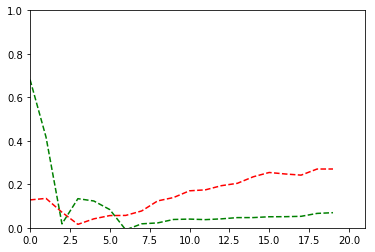

In [23]:
def kmeans_reduced_clusters(num, data):
    kmeans = KMeans(n_clusters=num, random_state=0).fit(data)
    kmeans_preds = kmeans.predict(data)
    kmeans_centers = kmeans.cluster_centers_
    kmeans_score = metrics.silhouette_score(data, kmeans_preds)
    return kmeans_score

def EM_reduced_clusters(num, data):
    EM = GaussianMixture(n_components=num, random_state=0).fit(data)
    EM_preds = EM.predict(data)
    EM_centers = EM.means_
    EM_score = metrics.silhouette_score(data, EM_preds)
    return EM_score

# print (kmeans_reduced_clusters(red_dfc_pca))
# print (kmeans_reduced_clusters(red_dfc_ica)) 
# print (kmeans_reduced_clusters(red_dfc_RP))
# print (kmeans_reduced_clusters(red_dfc_FA))

# print (EM_reduced_clusters(red_dfc_pca))
# print (EM_reduced_clusters(red_dfc_ica)) 
# print (EM_reduced_clusters(red_dfc_RP))
# print (EM_reduced_clusters(red_dfc_FA))

dfc_kmeans_scores = []
dfc_EM_scores = []

for i in range(0,20):    
    dfc_kmeans_scores.append(kmeans_reduced_clusters(i+2, red_dfc_pca))
    dfc_EM_scores.append(EM_reduced_clusters(i+2, red_dfc_RP))

# print (dfc_kmeans_scores, dfc_EM_scores)
    
plt.plot(dfc_kmeans_scores, 'r--', dfc_EM_scores, 'g--')
plt.axis([0,21,0,1])
plt.show()

